In [1]:
pip install roboflow

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="JYYqPwrI8R1SeCRxTwcz")
project = rf.workspace("project-qlmwa").project("number-fuieb")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to number-1 in yolov8:: 100%|██████████| 7590/7590 [00:01<00:00, 5275.15it/s]


In [3]:
# Define a function to write text to a file
def write_text_to_file(text, file_path):
    with open(file_path, 'w') as file:
        file.write(text)


text="""
names:
- '0'
- '1'
- '2'
- '3'
- '4'
- '5'
- '6'
- '7'
- '8'
- '9'
- l
- undefined
- x
nc: 13

test: /kaggle/working/number-1/test/images
train: /kaggle/working/number-1/train/images
val: /kaggle/working/number-1/valid/images

"""

write_text_to_file(text, "output.yaml")

In [3]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [5]:

import ultralytics
ultralytics.checks()

Ultralytics 8.3.25  Python-3.11.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-2630QM 2.00GHz)
Setup complete  (8 CPUs, 5.9 GB RAM, 179.3/292.9 GB disk)


In [5]:
# Train YOLOv8n on COCO8 for 10 epochs
!yolo task= detect mode= train data=/kaggle/working/number-1/data.yaml model=yolov8n.pt epochs=15 imgsz=640 batch=32

100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 91.9MB/s]
Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/number-1/data.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

In [6]:
from IPython.display import Image, display

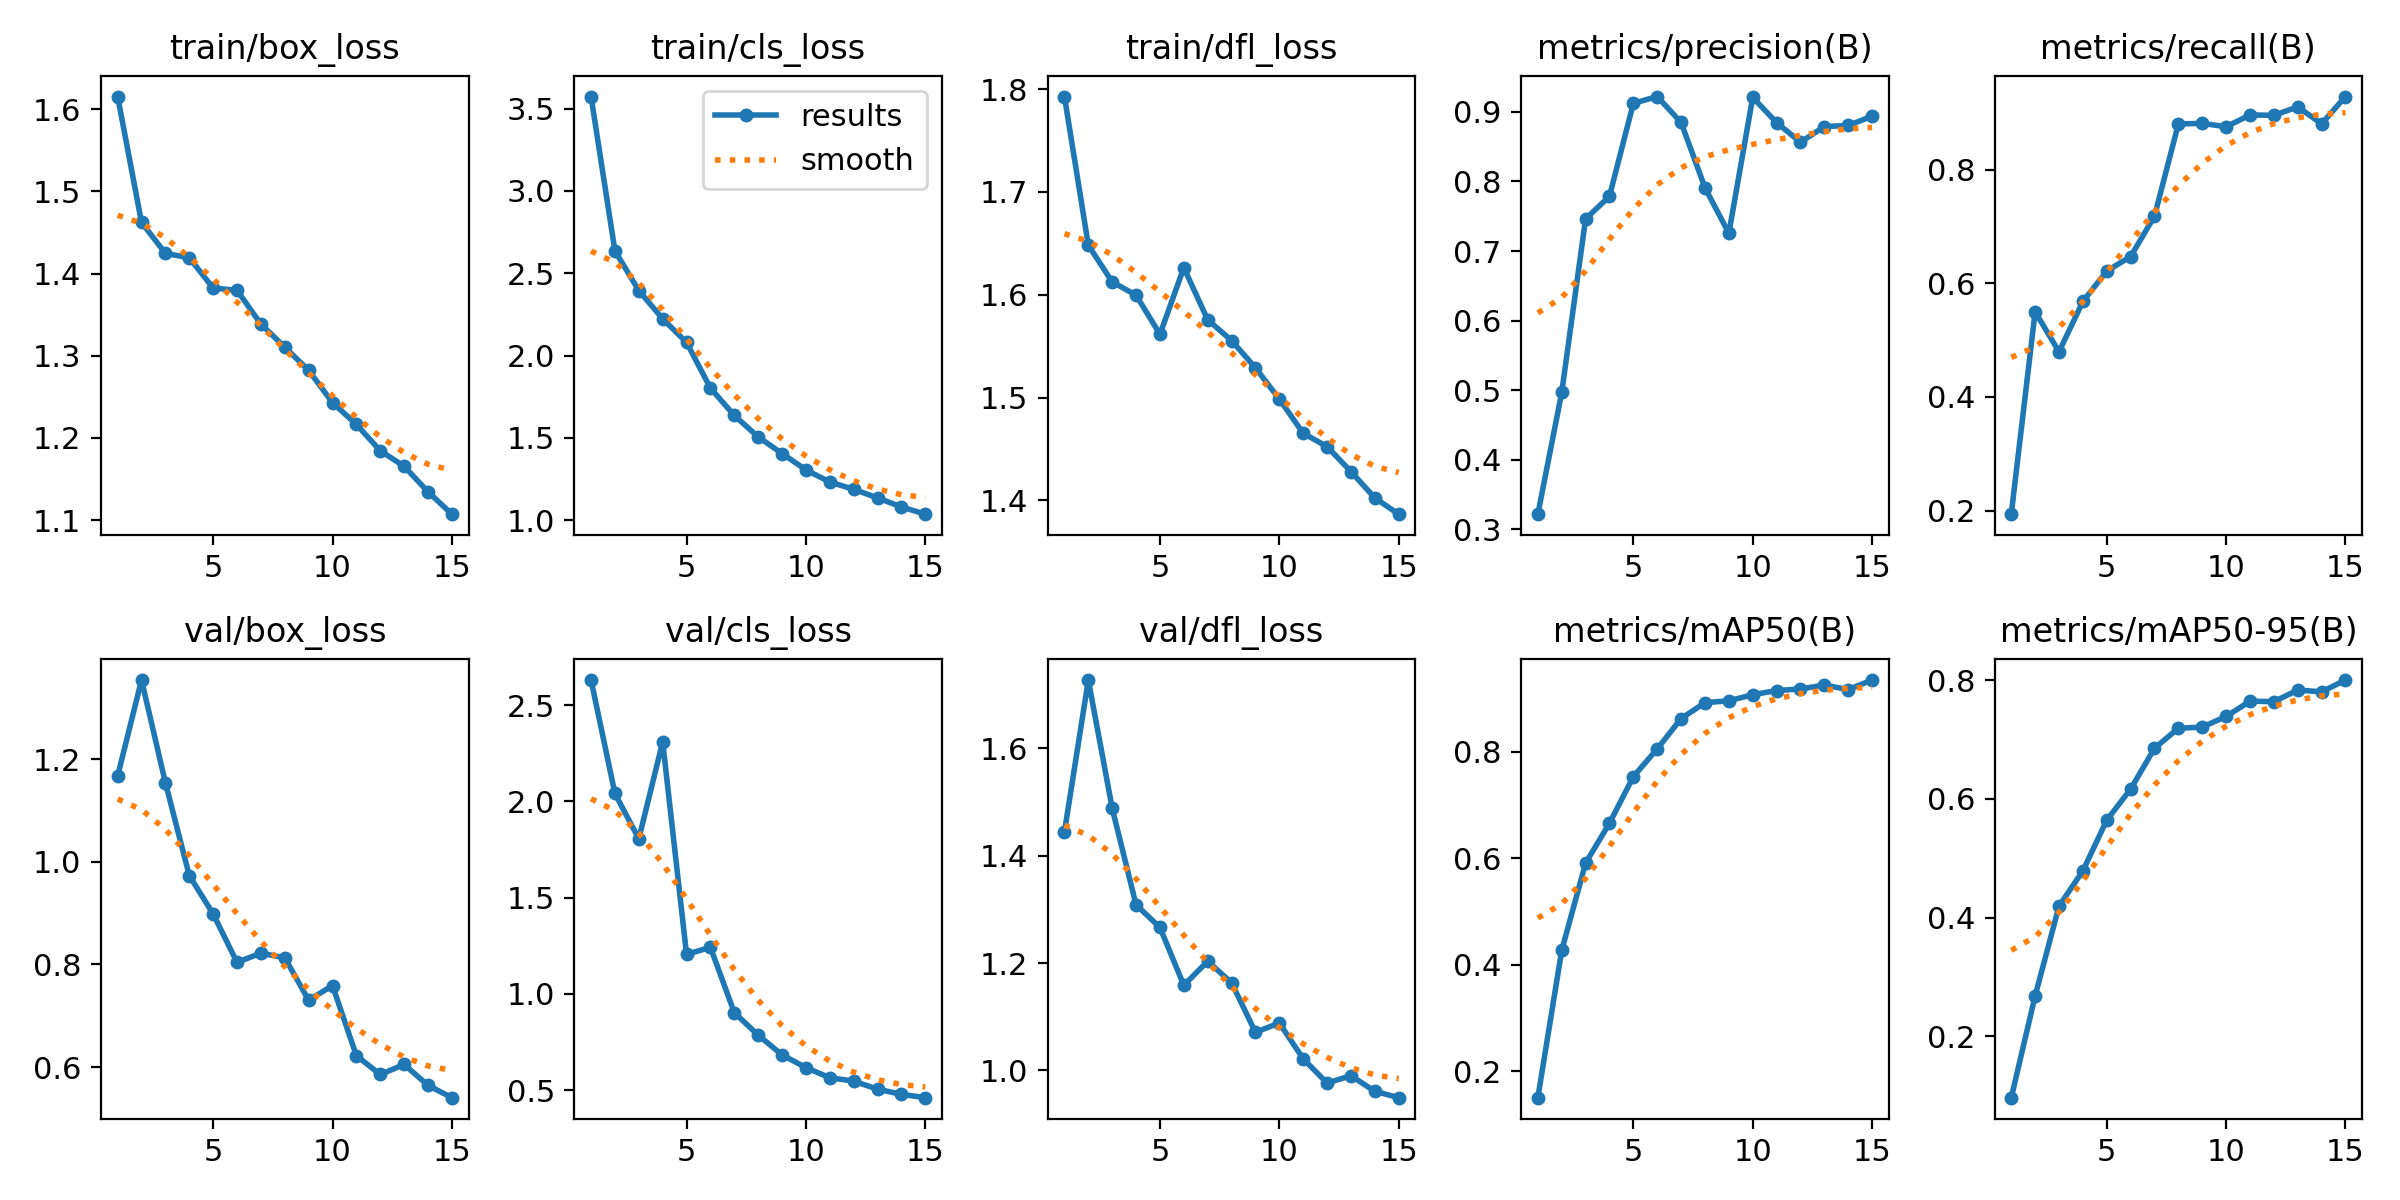

In [7]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000))

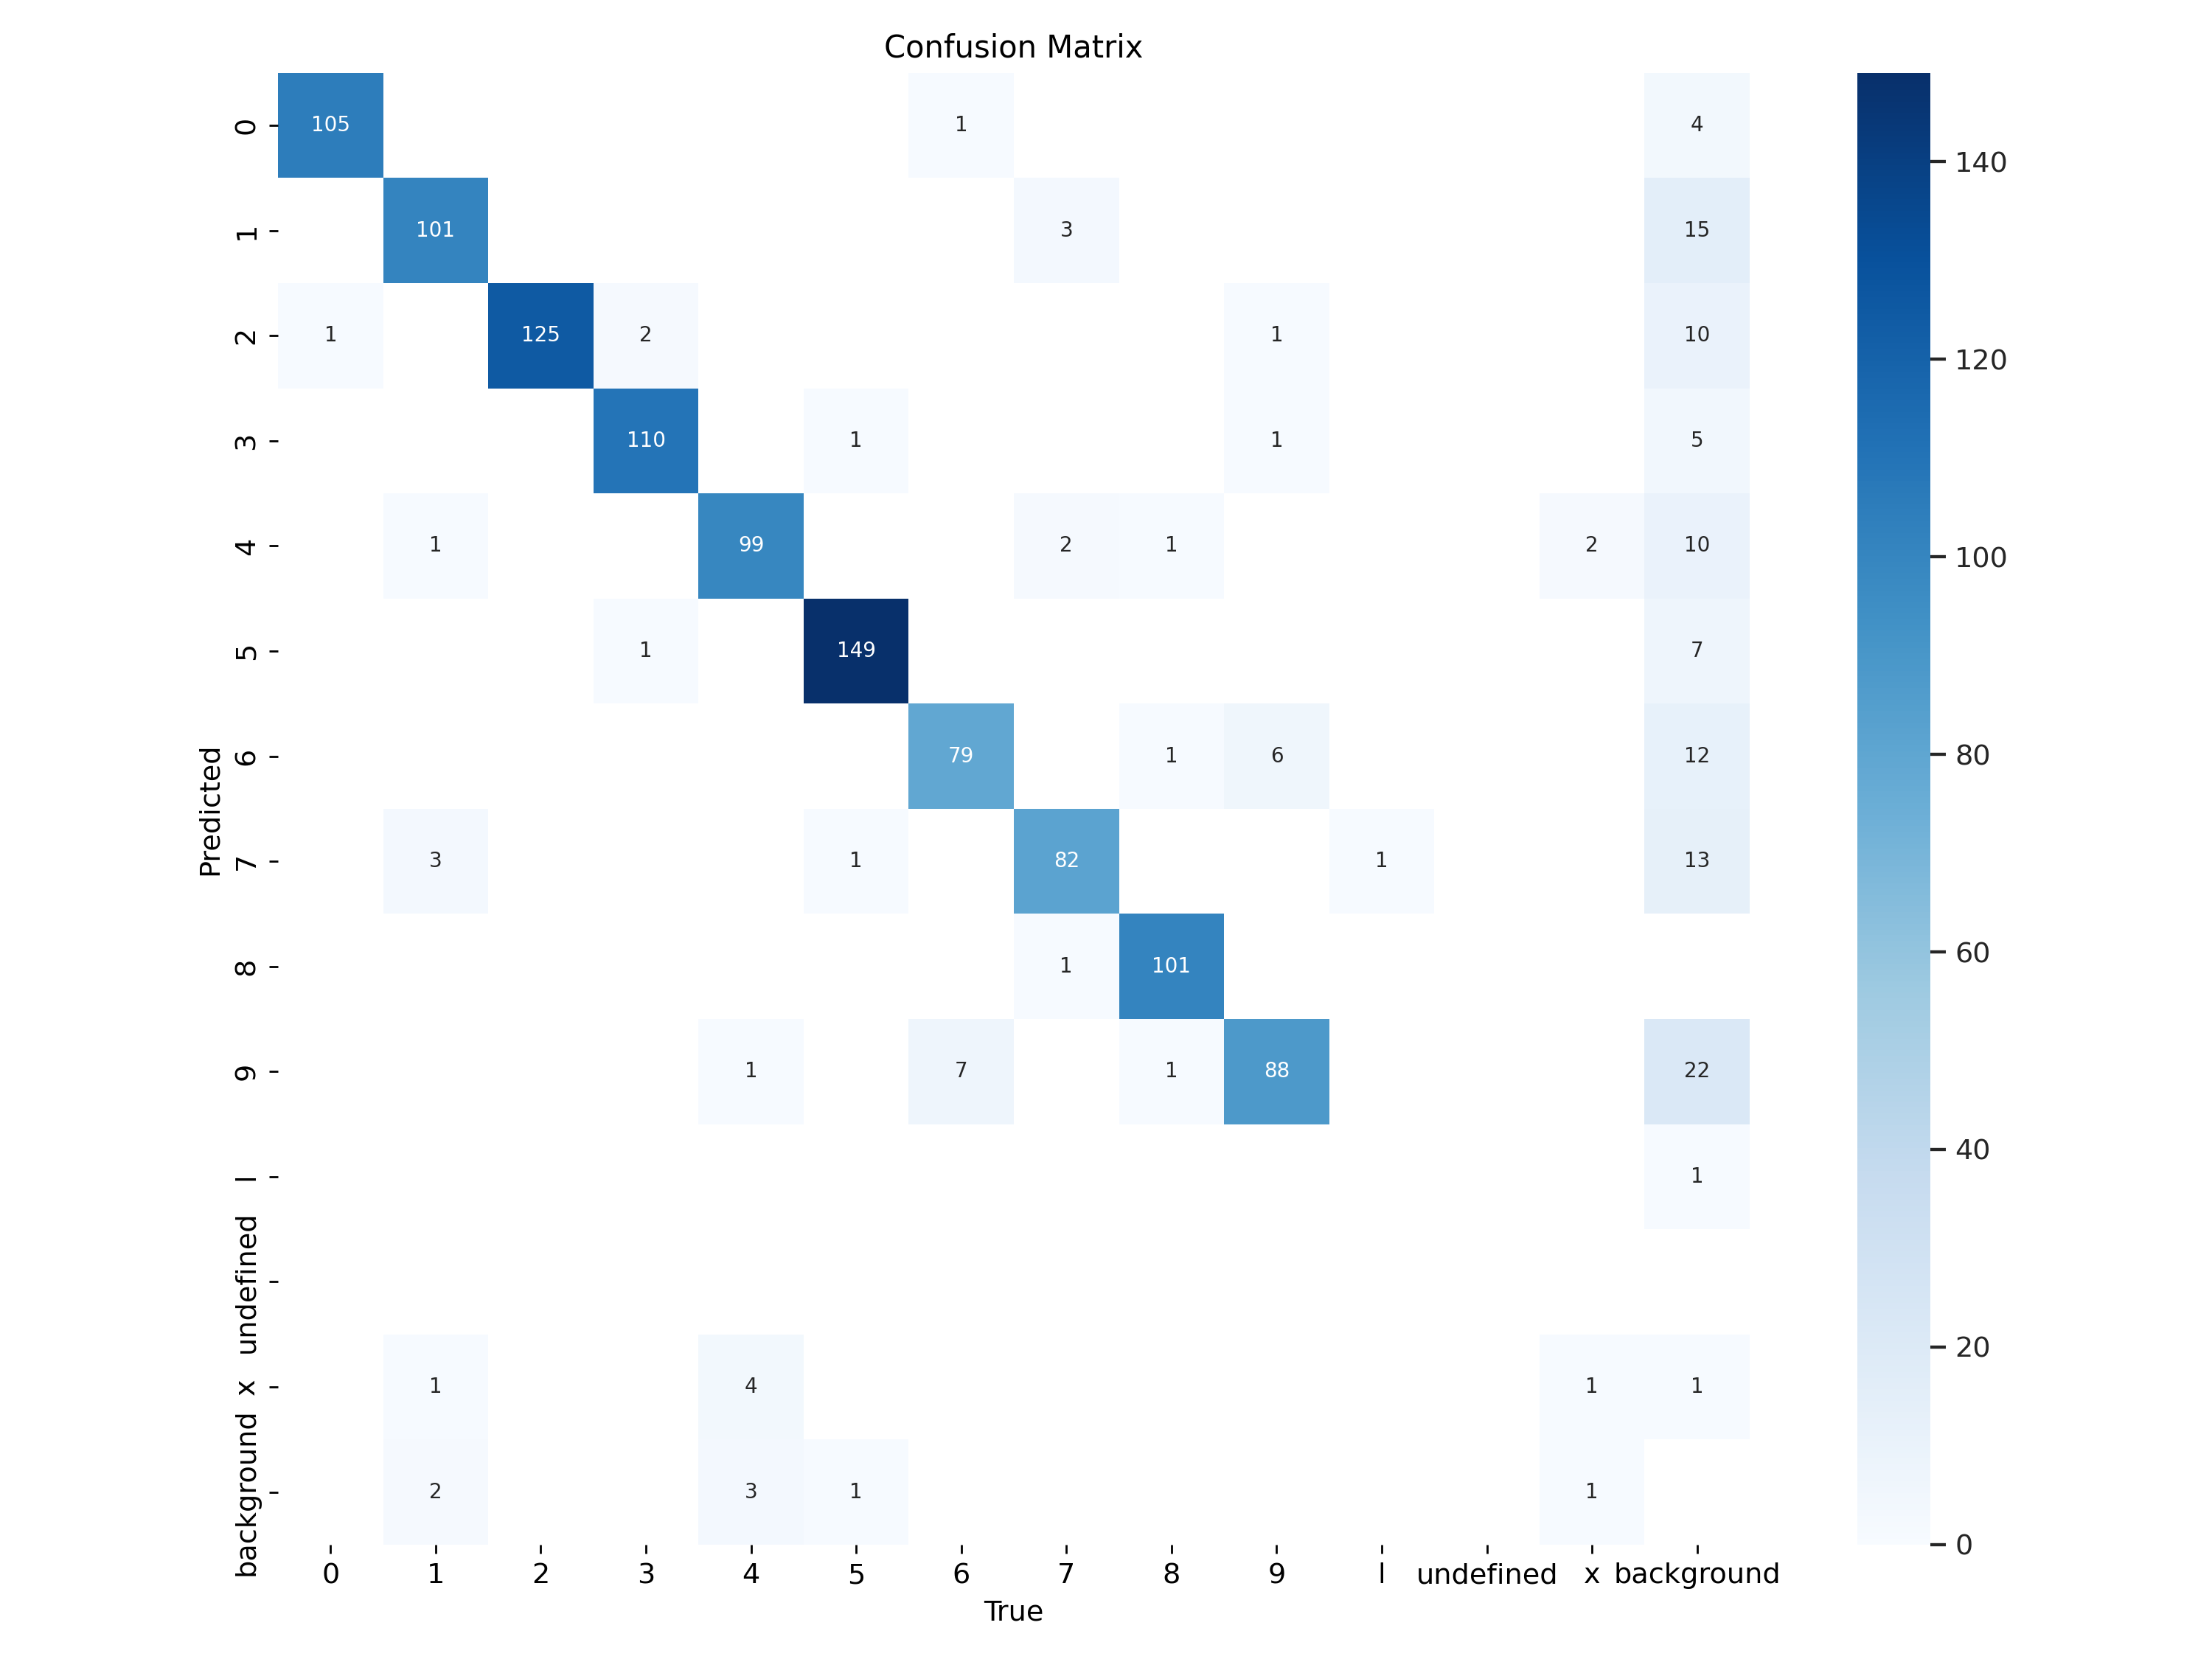

In [8]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000))

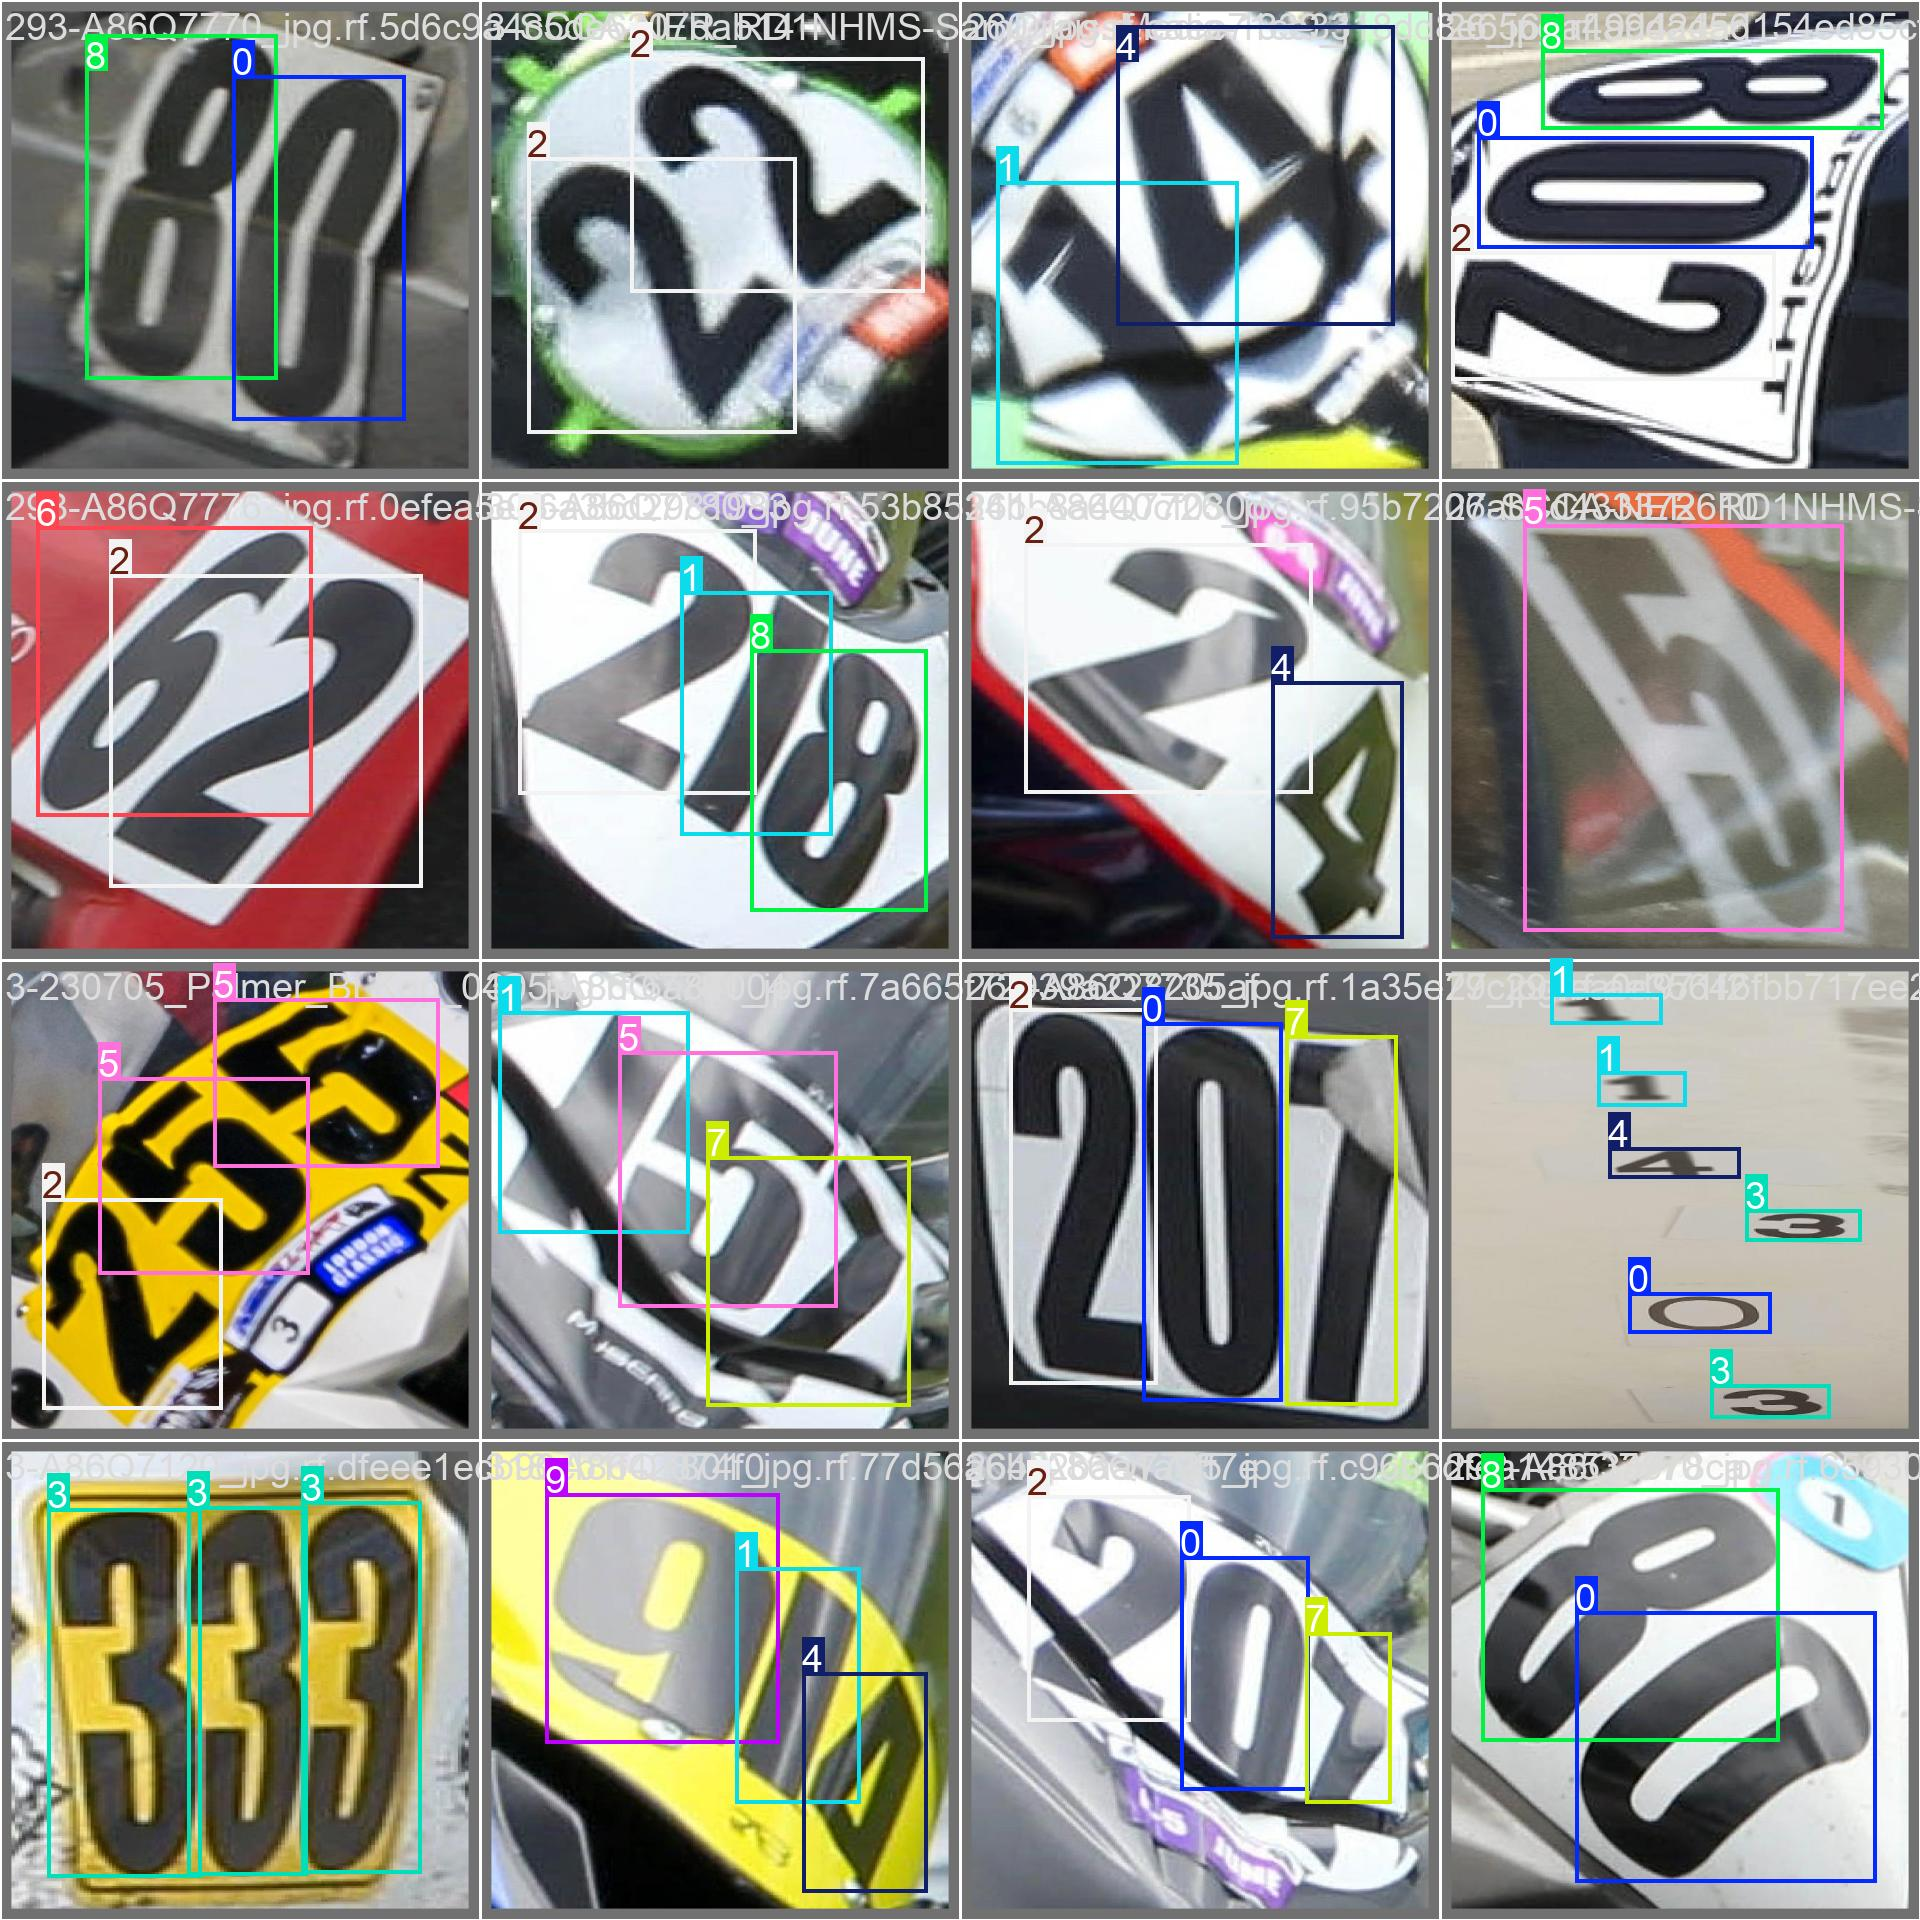

In [9]:
display(Image(filename=f"/kaggle/working/runs/detect/train/val_batch1_labels.jpg", width=1000))

In [10]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/kaggle/working/number-1/test/images

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs

image 1/135 /kaggle/working/number-1/test/images/0_jpg.rf.1064a913f3134394aa140633aed4a93e.jpg: 640x640 1 3, 1 7, 1 9, 8.4ms
image 2/135 /kaggle/working/number-1/test/images/102_jpg.rf.9b0638b0ab2db73685cbf4ccd8073d5b.jpg: 640x640 1 0, 1 2, 2 4s, 1 5, 2 6s, 2 8s, 7.5ms
image 3/135 /kaggle/working/number-1/test/images/103-A86Q7394_jpg.rf.25890f0b95157d29ff0b0205d018abe7.jpg: 640x640 1 1, 1 4, 1 9, 7.4ms
image 4/135 /kaggle/working/number-1/test/images/105_jpg.rf.f94cf3e013b3d41006b60864b72f73d4.jpg: 640x640 1 0, 1 4, 1 6, 1 7, 1 8, 7.4ms
image 5/135 /kaggle/working/number-1/test/images/12-SCCA-NER_RD1NHMS-SamDraissMedia-1425_jpg.rf.9a2bf7f8b6d0ca1f9e3aebdacddfd6e1.jpg: 640x640 1 5, 7.4ms
image 6/135 /kaggle/working/number-1/test/images/13-230705_Palmer_BLKgp_434_jpg.rf.c575595207d47d082c6eb37e9154df2f.jpg: 640x640 1 2, 2 5s, 10.1ms

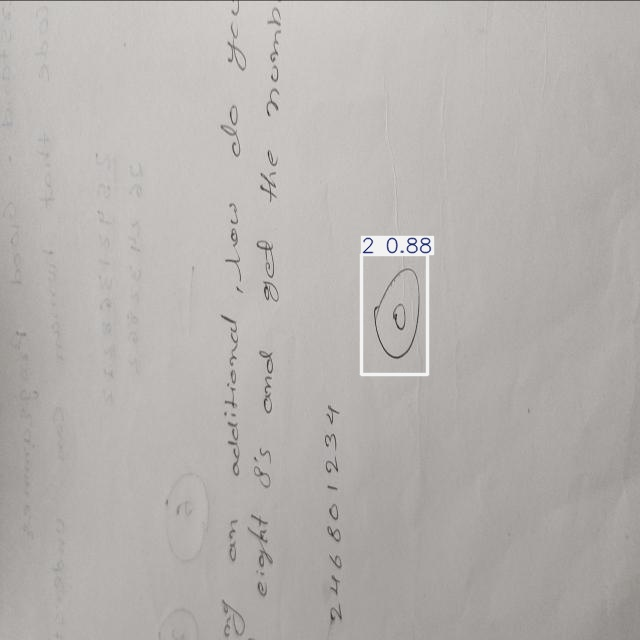

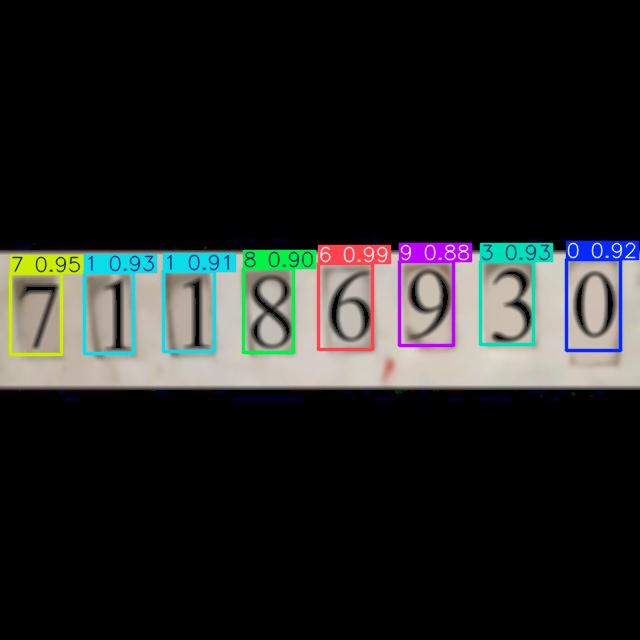

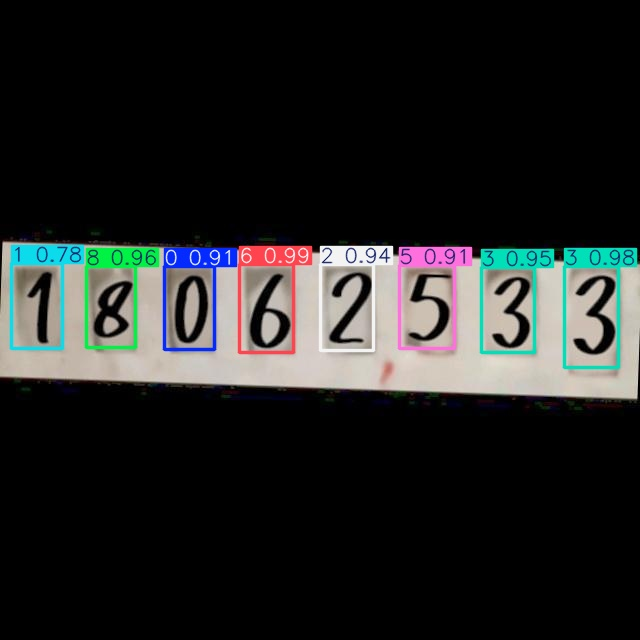

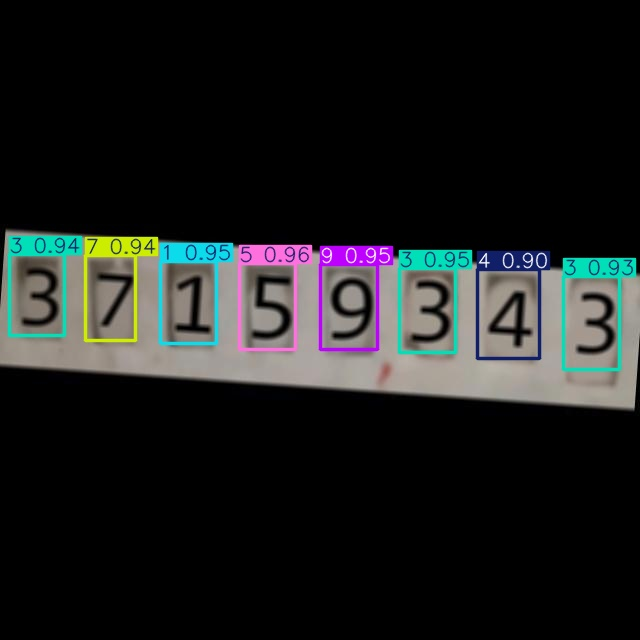

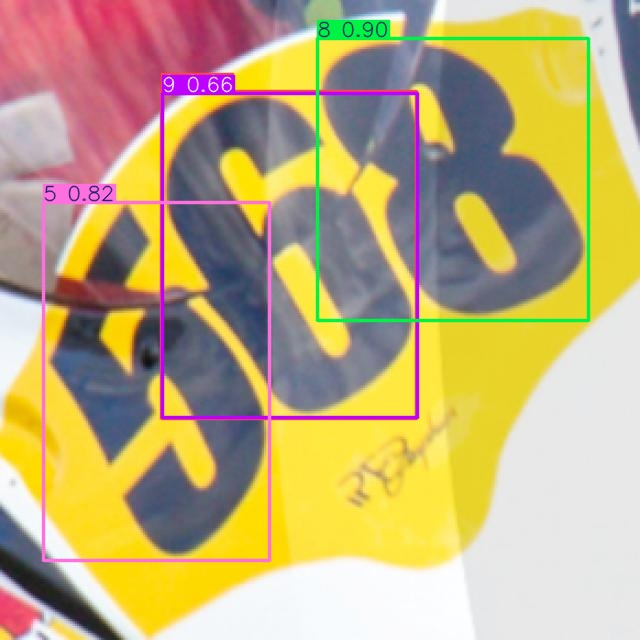

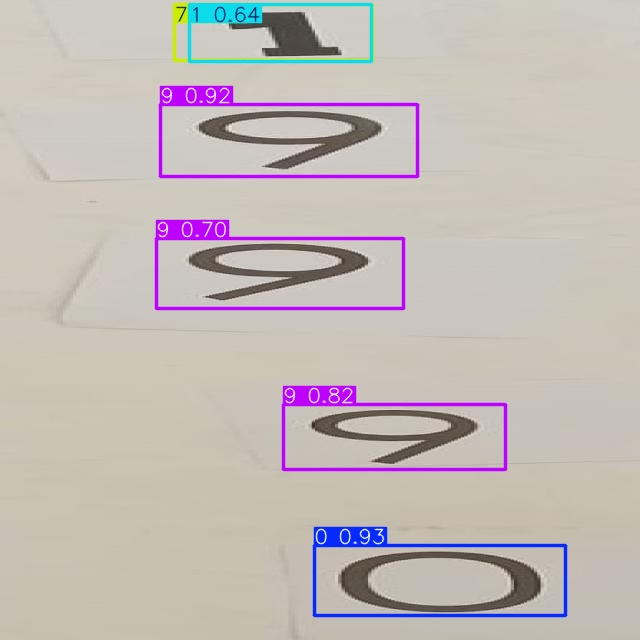

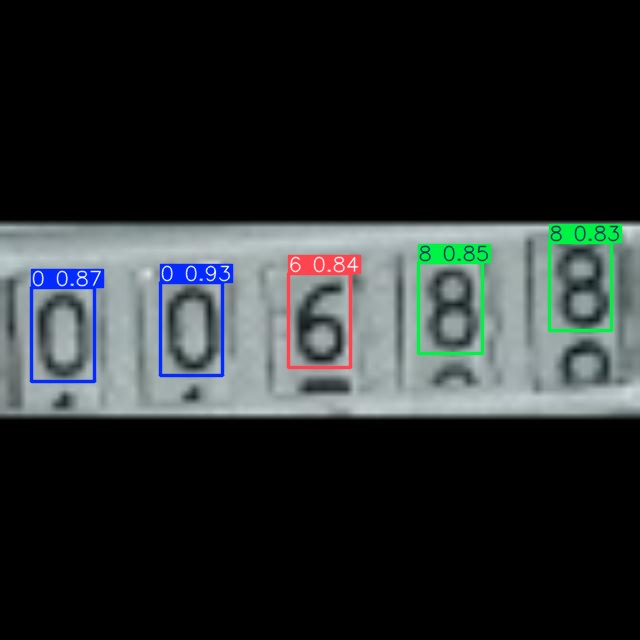

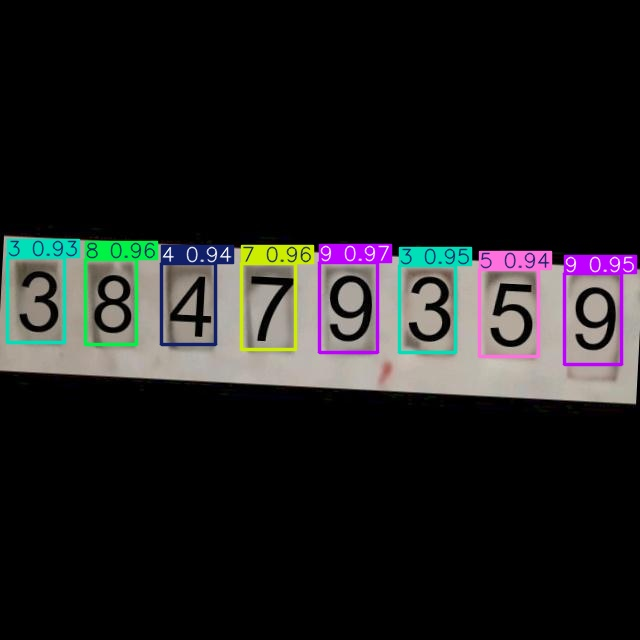

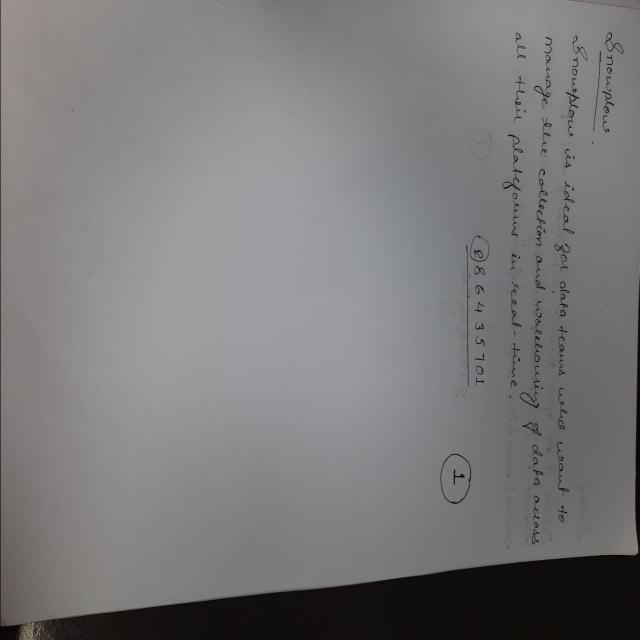

In [11]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/kaggle/working/runs/detect/predict/*.jpg"): 
    if i %15 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1


In [12]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
from ultralytics import YOLO
import cv2

# تحميل الموديل بالأوزان المدربة
model = YOLO("best.pt")  # ضعي مسار best.pt

# لفتح كاميرا الكمبيوتر (أو كاميرا الهاتف الموصولة)
cap = cv2.VideoCapture(1)  # 0 أو عنوان الـ IP لكاميرا الهاتف

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("لم أتمكن من قراءة الإطار")
        break

    # تنبؤ باستخدام الموديل
    results = model(frame)

    # عرض النتائج
    annotated_frame = results[0].plot()  # وضع علامات على الإطار
    cv2.imshow("YOLOv9 Real-Time Prediction", annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 322.0ms
Speed: 6.5ms preprocess, 322.0ms inference, 20.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 292.6ms
Speed: 5.0ms preprocess, 292.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 288.5ms
Speed: 7.6ms preprocess, 288.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 244.9ms
Speed: 3.0ms preprocess, 244.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 244.9ms
Speed: 4.0ms preprocess, 244.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 244.1ms
Speed: 3.7ms preprocess, 244.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 252.1ms
Speed: 7.3ms preprocess, 252.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 235.3ms
Speed: 9.2ms prep